# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's CartPole-v0 environment.

### 1. Import the Necessary Packages

In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [3]:
env = gym.make('CartPole-v0') # R_goal = 200
# env = gym.make('CartPole-v1') # R_goal = 500

random_seed = 10
env.seed(random_seed)

/home/arasdar/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


[10]

Please refer to the instructions in `Deep_Q_Network.ipynb` if you would like to write your own DQN agent.  Otherwise, run the code cell below to load the solution files.

In [4]:
env.observation_space, env.action_space

(Box(4,), Discrete(2))

In [5]:
env.observation_space.shape, env.action_space.shape

((4,), ())

In [6]:
env.observation_space.shape[0], env.action_space.n

(4, 2)

In [7]:
from agent import Agent

agent = Agent(s_size=env.observation_space.shape[0], a_size=env.action_space.n, 
              random_seed=random_seed)

In [8]:
# watch an untrained agent
s = env.reset()
R = 0

for _ in range(20):
    env.render()

    a = agent.act(s)
    s, r, done, _ = env.step(a)
    
    R += r
    
    if done:
        break 
        
    print('total reward:', R)
        
env.close()

total reward: 1.0
total reward: 2.0
total reward: 3.0
total reward: 4.0
total reward: 5.0
total reward: 6.0
total reward: 7.0


### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

In [10]:
"""Deep Q-Learning.

Params
======
    n_episodes (int): maximum number of training episodes
    n_steps (int): maximum number of timesteps per episode
    eps_start (float): starting value of epsilon, for epsilon-greedy action selection
    eps_end (float): minimum value of epsilon
    eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
"""
n_episodes=2000
#max_t=1000
R_goal = 200
Rs_deque = deque(maxlen=100)  # last 100 scores
Rs = []                        # list containing mean scores from each episode
meanRs_deque = []

eps_start=1.0
eps_end=0.01
eps_decay=0.995
eps = eps_start                    # initialize epsilon

In [11]:
for i_episode in range(n_episodes):
    s = env.reset()
    R = 0
    
    #for _ in range(max_t):
    while True:
        #env.render()
        
        a = agent.act(s, eps)
        s2, r, done, _ = env.step(a)
        agent.step(s, a, r, s2, done)
        
        s = s2
        R += r
        
        if done:
            break
            
    Rs.append(R)
    Rs_deque.append(R)       # save most recent score
    meanRs_deque.append(np.mean(Rs_deque))
    
    # exploration
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    
    #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)), end="")
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode+1, np.mean(Rs_deque)))
    
    if np.mean(Rs_deque)>=R_goal:
        torch.save(agent.q.state_dict(), 'q-cartpole.pth')
        break

Episode 1	Average Score: 17.00
Episode 2	Average Score: 21.50
Episode 3	Average Score: 18.00
Episode 4	Average Score: 17.25
Episode 5	Average Score: 16.60
Episode 6	Average Score: 18.50
Episode 7	Average Score: 18.14
Episode 8	Average Score: 19.00
Episode 9	Average Score: 21.00
Episode 10	Average Score: 20.80
Episode 11	Average Score: 21.00
Episode 12	Average Score: 20.50
Episode 13	Average Score: 21.00
Episode 14	Average Score: 22.29
Episode 15	Average Score: 22.33
Episode 16	Average Score: 22.62
Episode 17	Average Score: 21.94
Episode 18	Average Score: 23.50
Episode 19	Average Score: 25.21
Episode 20	Average Score: 24.45
Episode 21	Average Score: 24.14
Episode 22	Average Score: 23.68
Episode 23	Average Score: 23.48
Episode 24	Average Score: 23.00
Episode 25	Average Score: 22.72
Episode 26	Average Score: 22.31
Episode 27	Average Score: 22.33
Episode 28	Average Score: 22.75
Episode 29	Average Score: 22.59
Episode 30	Average Score: 22.20
Episode 31	Average Score: 21.81
Episode 32	Averag

Episode 260	Average Score: 12.79
Episode 261	Average Score: 12.80
Episode 262	Average Score: 12.80
Episode 263	Average Score: 12.80
Episode 264	Average Score: 12.76
Episode 265	Average Score: 12.75
Episode 266	Average Score: 12.60
Episode 267	Average Score: 12.59
Episode 268	Average Score: 12.53
Episode 269	Average Score: 12.54
Episode 270	Average Score: 12.41
Episode 271	Average Score: 12.39
Episode 272	Average Score: 12.39
Episode 273	Average Score: 12.36
Episode 274	Average Score: 12.37
Episode 275	Average Score: 12.37
Episode 276	Average Score: 12.38
Episode 277	Average Score: 12.36
Episode 278	Average Score: 12.37
Episode 279	Average Score: 12.37
Episode 280	Average Score: 12.30
Episode 281	Average Score: 12.36
Episode 282	Average Score: 12.24
Episode 283	Average Score: 12.24
Episode 284	Average Score: 12.26
Episode 285	Average Score: 12.35
Episode 286	Average Score: 12.38
Episode 287	Average Score: 12.40
Episode 288	Average Score: 12.38
Episode 289	Average Score: 12.23
Episode 29

Episode 518	Average Score: 10.53
Episode 519	Average Score: 10.54
Episode 520	Average Score: 10.51
Episode 521	Average Score: 10.51
Episode 522	Average Score: 10.49
Episode 523	Average Score: 10.53
Episode 524	Average Score: 10.51
Episode 525	Average Score: 10.50
Episode 526	Average Score: 10.52
Episode 527	Average Score: 10.52
Episode 528	Average Score: 10.46
Episode 529	Average Score: 10.46
Episode 530	Average Score: 10.46
Episode 531	Average Score: 10.47
Episode 532	Average Score: 10.49
Episode 533	Average Score: 10.64
Episode 534	Average Score: 10.65
Episode 535	Average Score: 10.64
Episode 536	Average Score: 10.64
Episode 537	Average Score: 10.64
Episode 538	Average Score: 10.64
Episode 539	Average Score: 10.64
Episode 540	Average Score: 10.64
Episode 541	Average Score: 10.63
Episode 542	Average Score: 10.63
Episode 543	Average Score: 10.62
Episode 544	Average Score: 10.60
Episode 545	Average Score: 10.58
Episode 546	Average Score: 10.57
Episode 547	Average Score: 10.57
Episode 54

Episode 773	Average Score: 9.99
Episode 774	Average Score: 9.99
Episode 775	Average Score: 9.99
Episode 776	Average Score: 9.99
Episode 777	Average Score: 9.97
Episode 778	Average Score: 9.97
Episode 779	Average Score: 9.97
Episode 780	Average Score: 9.98
Episode 781	Average Score: 10.00
Episode 782	Average Score: 10.01
Episode 783	Average Score: 10.01
Episode 784	Average Score: 10.01
Episode 785	Average Score: 10.01
Episode 786	Average Score: 9.99
Episode 787	Average Score: 9.99
Episode 788	Average Score: 9.98
Episode 789	Average Score: 9.98
Episode 790	Average Score: 9.99
Episode 791	Average Score: 9.99
Episode 792	Average Score: 9.99
Episode 793	Average Score: 10.00
Episode 794	Average Score: 10.00
Episode 795	Average Score: 9.99
Episode 796	Average Score: 9.99
Episode 797	Average Score: 9.99
Episode 798	Average Score: 10.00
Episode 799	Average Score: 10.00
Episode 800	Average Score: 10.00
Episode 801	Average Score: 10.01
Episode 802	Average Score: 10.01
Episode 803	Average Score: 1

Episode 1030	Average Score: 10.01
Episode 1031	Average Score: 10.01
Episode 1032	Average Score: 10.02
Episode 1033	Average Score: 10.02
Episode 1034	Average Score: 10.02
Episode 1035	Average Score: 10.02
Episode 1036	Average Score: 10.02
Episode 1037	Average Score: 10.01
Episode 1038	Average Score: 10.01
Episode 1039	Average Score: 10.01
Episode 1040	Average Score: 10.02
Episode 1041	Average Score: 10.02
Episode 1042	Average Score: 10.02
Episode 1043	Average Score: 10.01
Episode 1044	Average Score: 10.01
Episode 1045	Average Score: 10.01
Episode 1046	Average Score: 10.01
Episode 1047	Average Score: 10.01
Episode 1048	Average Score: 10.01
Episode 1049	Average Score: 10.01
Episode 1050	Average Score: 10.01
Episode 1051	Average Score: 10.01
Episode 1052	Average Score: 10.02
Episode 1053	Average Score: 10.01
Episode 1054	Average Score: 10.00
Episode 1055	Average Score: 10.00
Episode 1056	Average Score: 10.00
Episode 1057	Average Score: 10.01
Episode 1058	Average Score: 10.01
Episode 1059	A

Episode 1284	Average Score: 9.94
Episode 1285	Average Score: 9.94
Episode 1286	Average Score: 9.95
Episode 1287	Average Score: 9.95
Episode 1288	Average Score: 9.97
Episode 1289	Average Score: 9.97
Episode 1290	Average Score: 9.95
Episode 1291	Average Score: 9.95
Episode 1292	Average Score: 9.95
Episode 1293	Average Score: 9.95
Episode 1294	Average Score: 9.95
Episode 1295	Average Score: 9.95
Episode 1296	Average Score: 9.95
Episode 1297	Average Score: 9.95
Episode 1298	Average Score: 9.96
Episode 1299	Average Score: 9.96
Episode 1300	Average Score: 9.96
Episode 1301	Average Score: 9.95
Episode 1302	Average Score: 9.95
Episode 1303	Average Score: 9.95
Episode 1304	Average Score: 9.96
Episode 1305	Average Score: 9.95
Episode 1306	Average Score: 9.96
Episode 1307	Average Score: 9.96
Episode 1308	Average Score: 9.96
Episode 1309	Average Score: 9.97
Episode 1310	Average Score: 9.97
Episode 1311	Average Score: 9.97
Episode 1312	Average Score: 9.97
Episode 1313	Average Score: 9.97
Episode 13

Episode 1536	Average Score: 9.97
Episode 1537	Average Score: 9.97
Episode 1538	Average Score: 9.96
Episode 1539	Average Score: 9.96
Episode 1540	Average Score: 9.96
Episode 1541	Average Score: 9.96
Episode 1542	Average Score: 9.96
Episode 1543	Average Score: 9.95
Episode 1544	Average Score: 9.95
Episode 1545	Average Score: 9.93
Episode 1546	Average Score: 9.93
Episode 1547	Average Score: 9.93
Episode 1548	Average Score: 9.93
Episode 1549	Average Score: 9.95
Episode 1550	Average Score: 9.94
Episode 1551	Average Score: 9.95
Episode 1552	Average Score: 9.94
Episode 1553	Average Score: 9.94
Episode 1554	Average Score: 9.95
Episode 1555	Average Score: 9.95
Episode 1556	Average Score: 9.96
Episode 1557	Average Score: 9.96
Episode 1558	Average Score: 9.98
Episode 1559	Average Score: 9.98
Episode 1560	Average Score: 9.98
Episode 1561	Average Score: 10.11
Episode 1562	Average Score: 10.11
Episode 1563	Average Score: 10.11
Episode 1564	Average Score: 10.11
Episode 1565	Average Score: 10.12
Episo

Episode 1784	Average Score: 10.00
Episode 1785	Average Score: 10.00
Episode 1786	Average Score: 10.00
Episode 1787	Average Score: 10.00
Episode 1788	Average Score: 10.00
Episode 1789	Average Score: 10.00
Episode 1790	Average Score: 10.01
Episode 1791	Average Score: 10.02
Episode 1792	Average Score: 10.02
Episode 1793	Average Score: 10.01
Episode 1794	Average Score: 10.03
Episode 1795	Average Score: 10.02
Episode 1796	Average Score: 10.02
Episode 1797	Average Score: 10.03
Episode 1798	Average Score: 10.03
Episode 1799	Average Score: 10.04
Episode 1800	Average Score: 10.04
Episode 1801	Average Score: 10.04
Episode 1802	Average Score: 10.05
Episode 1803	Average Score: 10.05
Episode 1804	Average Score: 10.06
Episode 1805	Average Score: 10.05
Episode 1806	Average Score: 10.05
Episode 1807	Average Score: 10.05
Episode 1808	Average Score: 10.05
Episode 1809	Average Score: 10.06
Episode 1810	Average Score: 10.06
Episode 1811	Average Score: 10.06
Episode 1812	Average Score: 10.06
Episode 1813	A

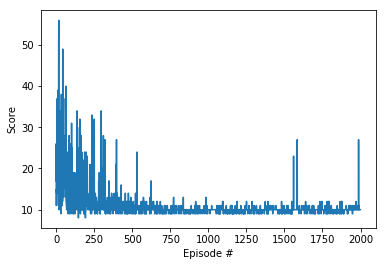

In [12]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(Rs)), Rs)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

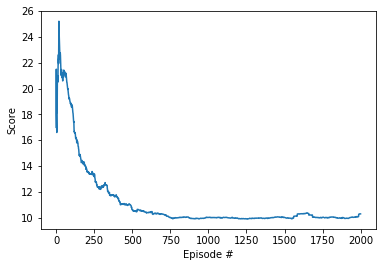

In [13]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(meanRs_deque)), meanRs_deque)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [14]:
# load the weights from file
agent.q.load_state_dict(torch.load('q-cartpole.pth'))

# for i in range(3):
s = env.reset()
R = 0 # total reward

#for j in range(200):
while True:
    env.render()

    a = agent.act(s)

    s, r, done, _ = env.step(a)
    
    R += r

    if done:
        break

print('total reward:{:.2f}'.format(R))            
env.close()

FileNotFoundError: [Errno 2] No such file or directory: 'q-cartpole.pth'

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  